# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "Data/train.p"
validation_file = "Data/valid.p"
testing_file = "Data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = len(y_train)

# Number of validation examples
n_validation = len(y_valid)

# Number of testing examples.
n_test = len(y_test)

# What's the shape of an traffic sign image?
image_shape = str(len(X_train[1])) + "x" + str(len(X_train[1][1]))

# TODO: How many unique classes/labels there are in the dataset.
classes = []
n_classes = 0
# min_value = 255
# max_value = -1
for i in range(len(y_train)):
    firstSight = True
    for i2 in range(len(classes)):
        if classes[i2] == y_train[i]:
            firstSight = False
    if firstSight:
        classes.append(y_train[i])
        n_classes += 1
        
# Confirm the maximum and the minimum values for later normalisation #
#     for i2 in range(len(X_train[i])):
#         for i3 in range(len(X_train[i][i2])):
#             if min(X_train[i][i2][i3]) < min_value:
#                 min_value = min(X_train[i][i2][i3])
#             if max(X_train[i][i2][i3]) > max_value:
#                 max_value = max(X_train[i][i2][i3])
# print("Minimum value =", min_value)
# print("Maximum value =", max_value)
# Outcome as expected minimum = 0 and maximum = 255 #

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = 32x32
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

['35', 'Ahead only']


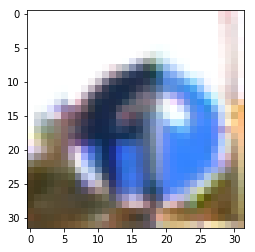

['35', 'Ahead only']


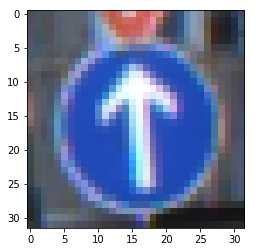

['7', 'Speed limit (100km/h)']


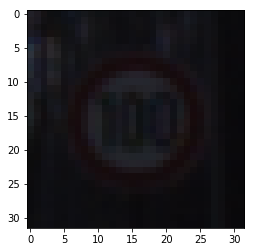

['8', 'Speed limit (120km/h)']


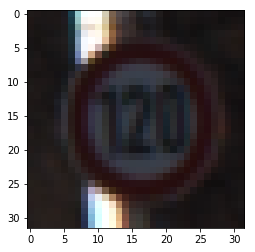

['38', 'Keep right']


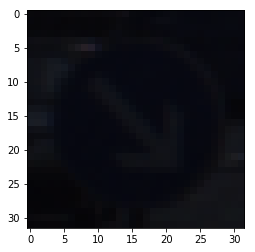

['2', 'Speed limit (50km/h)']


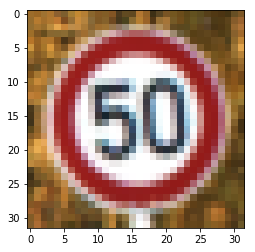

['35', 'Ahead only']


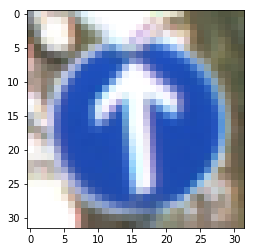

['4', 'Speed limit (70km/h)']


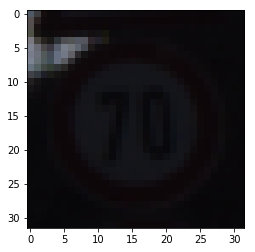

['5', 'Speed limit (80km/h)']


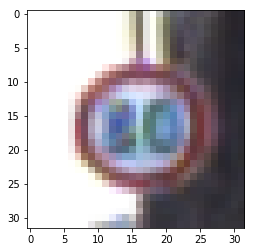

['18', 'General caution']


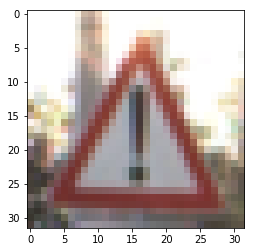

The amount of images of each type in the training dataset (minimum: 180; maximum: 2010): 
180	:0	(End of no passing by vehicles over 3.5 metric tons)
1980	:1	(SignName)
2010	:2	(Speed limit (20km/h))
1260	:3	(Speed limit (30km/h))
1770	:4	(Speed limit (50km/h))
1650	:5	(Speed limit (60km/h))
360	:6	(Speed limit (70km/h))
1290	:7	(Speed limit (80km/h))
1260	:8	(End of speed limit (80km/h))
1320	:9	(Speed limit (100km/h))
1800	:10	(Speed limit (120km/h))
1170	:11	(No passing)
1890	:12	(No passing for vehicles over 3.5 metric tons)
1920	:13	(Right-of-way at the next intersection)
690	:14	(Priority road)
540	:15	(Yield)
360	:16	(Stop)
990	:17	(No vehicles)
1080	:18	(Vehicles over 3.5 metric tons prohibited)
180	:19	(No entry)
300	:20	(General caution)
270	:21	(Dangerous curve to the left)
330	:22	(Dangerous curve to the right)
450	:23	(Double curve)
240	:24	(Bumpy road)
1350	:25	(Slippery road)
540	:26	(Road narrows on the right)
210	:27	(Road work)
480	:28	(Traffic signals)
240	:29	(Pedes

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline

with open('signnames.csv', 'r') as csv_file:
    csv_content = csv.reader(csv_file)
    sign_index_meaning = list(csv_content)

for i in range(10):
    # Sample a random index from the entire training set
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    # Display this image with its index
    print(sign_index_meaning[y_train[index]+1])
    plt.figure(figsize=(4,4))
    plt.imshow(image)
    plt.show()

# Count and display the amount images of each type #
label_count = [0]*43
for i in range(1,n_train):
    label_count[y_train[i]] += 1
print('\033[1m' + "The amount of images of each type in the training dataset " + '\033[0m' + "(minimum: " + str(min(label_count)) + "; maximum: " + str(max(label_count)) + "): ")
for i in range(len(label_count)):
    print(str(label_count[i]) + "\t:" + str(i) + "\t(" + sign_index_meaning[i-1][1] + ")")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here ###

In [5]:
# Import shuffle to shuffle the input data every epoch #
from sklearn.utils import shuffle

In [6]:
import cv2

# Setup tensorflow and high level hyperparameters #
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128
TO_GRAY = True
LEARNING_RATE = 0.001

In [7]:
# Normalise the data #
X_train_normal = np.array(X_train)
X_valid_normal = np.array(X_valid)
X_test_normal = np.array(X_test)

X_train_normal = X_train_normal/255.0
X_valid_normal = X_valid_normal/255.0
X_test_normal = X_test_normal/255.0

### Model Architecture

In [8]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal ( which will randomly define variables for the weights and biases for each layer) #
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3 or 32x32x1. Output = 28x28x6 #
    conv1_b = tf.Variable(tf.zeros(6))
    if TO_GRAY:
        x_gray = tf.image.rgb_to_grayscale(x)
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
        conv1   = tf.nn.conv2d(x_gray, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    else:
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation 1 #
    conv1 = tf.nn.relu(conv1)

    # Pooling 1. Input = 28x28x6. Output = 14x14x6 #
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16 #
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation 2 #
    conv2 = tf.nn.relu(conv2)

    # Pooling 2. Input = 10x10x16. Output = 5x5x16 #
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400 in order to form input for the fully connected layers#
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120 #
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation 3 #
    fc1    = tf.nn.relu(fc1)
    
    # Dropout 1 #
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84 #
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation 4 #
    fc2    = tf.nn.relu(fc2)
    
    # Dropout 2 #
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43 #
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Features and Labels
Train LeNet to classify traffic sign data.
`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [10]:
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### Training pipeline
Create a training pipeline that uses the model to classify traffic sign data.

In [11]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

### Model evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the model and validate
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_normal)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_normal, y_train = shuffle(X_train_normal, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_normal[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        training_accuracy = evaluate(X_train_normal, y_train)
        validation_accuracy = evaluate(X_valid_normal, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training accuracy = {:.3f}".format(training_accuracy))
        print("Validation accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training accuracy = 0.537
Validation accuracy = 0.480

EPOCH 2 ...
Training accuracy = 0.745
Validation accuracy = 0.712

EPOCH 3 ...
Training accuracy = 0.859
Validation accuracy = 0.809

EPOCH 4 ...
Training accuracy = 0.898
Validation accuracy = 0.850

EPOCH 5 ...
Training accuracy = 0.923
Validation accuracy = 0.883

EPOCH 6 ...
Training accuracy = 0.933
Validation accuracy = 0.881

EPOCH 7 ...
Training accuracy = 0.953
Validation accuracy = 0.904

EPOCH 8 ...
Training accuracy = 0.956
Validation accuracy = 0.906

EPOCH 9 ...
Training accuracy = 0.962
Validation accuracy = 0.913

EPOCH 10 ...
Training accuracy = 0.967
Validation accuracy = 0.915

EPOCH 11 ...
Training accuracy = 0.974
Validation accuracy = 0.928

EPOCH 12 ...
Training accuracy = 0.975
Validation accuracy = 0.928

EPOCH 13 ...
Training accuracy = 0.976
Validation accuracy = 0.937

EPOCH 14 ...
Training accuracy = 0.982
Validation accuracy = 0.938

EPOCH 15 ...
Training accuracy = 0.984
Valid

### Test the model
On the independent test dataset in order to mitigate the influence of the learning effect on the continuously used validation dataset.

In [57]:
import tensorflow as tf

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    testing_accuracy = evaluate(X_test, y_test)
    print("Testing Accuracy = {:.3f}".format(testing_accuracy))

Testing Accuracy = 0.911


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['11', 'Right-of-way at the next intersection']


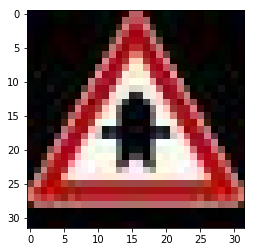

['18', 'General caution']


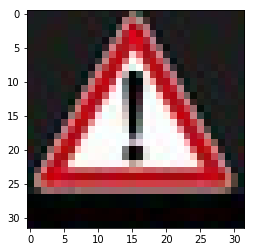

['21', 'Double curve']


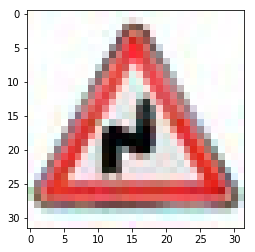

['25', 'Road work']


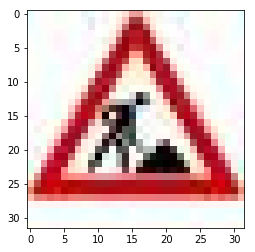

['31', 'Wild animals crossing']


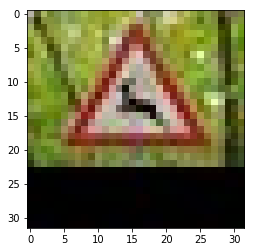

In [58]:
# import os
# cwd = os.getcwd()
# print(cwd)

# Load and list the images #
custom_images = []
custom_images.append(cv2.cvtColor(cv2.imread("./Data/Example_images/Right_size/old/11.resized.jpg"), cv2.COLOR_RGB2BGR))
custom_images.append(cv2.cvtColor(cv2.imread("./Data/Example_images/Right_size/old/18.resized.jpg"), cv2.COLOR_RGB2BGR))
custom_images.append(cv2.cvtColor(cv2.imread("./Data/Example_images/Right_size/old/21.resized.jpg"), cv2.COLOR_RGB2BGR))
custom_images.append(cv2.cvtColor(cv2.imread("./Data/Example_images/Right_size/old/25.resized.jpg"), cv2.COLOR_RGB2BGR))
custom_images.append(cv2.cvtColor(cv2.imread("./Data/Example_images/Right_size/old/31.resized.jpg"), cv2.COLOR_RGB2BGR))

custom_images_np = np.array(custom_images)
custom_images_np = custom_images_np/255.0

# Define labels for the random images #
custom_labels = np.array([11,18,21,25,31])

# Show the images with label and label meaning #
for i in range(len(custom_images)):
    print(sign_index_meaning[custom_labels[i]+1])
    plt.imshow(custom_images[i])
    plt.show()

### Predict the Sign Type for Each Image

Actual sign: 11 (Right-of-way at the next intersection)
Predicted sign: 11 (Right-of-way at the next intersection)
Certainty of prediction: 100%


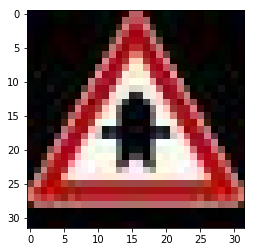

Actual sign: 18 (General caution)
Predicted sign: 18 (General caution)
Certainty of prediction: 86%


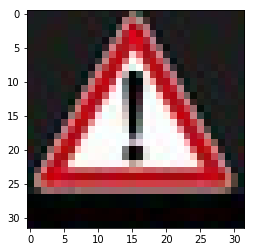

Actual sign: 21 (Double curve)
Predicted sign: 28 (Children crossing)
Certainty of prediction: 96%


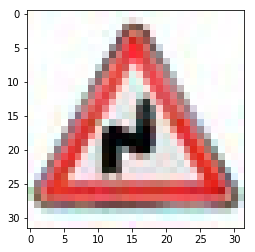

Actual sign: 25 (Road work)
Predicted sign: 25 (Road work)
Certainty of prediction: 100%


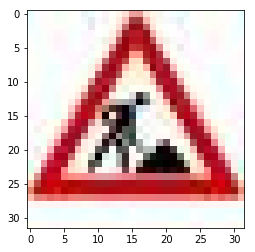

Actual sign: 31 (Wild animals crossing)
Predicted sign: 18 (General caution)
Certainty of prediction: 88%


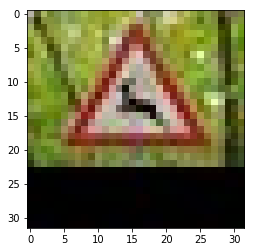

In [59]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

softmax = tf.nn.softmax(logits=logits)
top_k = tf.nn.top_k(softmax, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    
    # Evaluate overall accuracy #
    custom_accuracy = evaluate(custom_images_np, custom_labels)
    
    # Get the top 5 predictions of the neural network #
    top_k = sess.run(top_k, feed_dict={x: custom_images_np, y: custom_labels, keep_prob: 1.0})
    
for i in range(len(top_k[1])):
    print("Actual sign: " + str(custom_labels[i]) + " (" + sign_index_meaning[custom_labels[i]+1][1] + ")")
    print("Predicted sign: " + str(top_k[1][i][0]) + " (" + sign_index_meaning[top_k[1][i][0]+1][1] + ")")
    print("Certainty of prediction: " + str(int((top_k[0][i][0])*100)) + "%")
    plt.imshow(custom_images[i])
    plt.show()
    

### Analyze Performance

In [60]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print("Custom accuracy = {:.3f}".format(custom_accuracy))

certainty = int((top_k[0][0][0] + top_k[0][1][0] + top_k[0][2][0] + top_k[0][3][0] + top_k[0][4][0]) / 5 * 100)
print("Total certainty of prediction: " + str(certainty) + "%")


Custom accuracy = 0.600
Total certainty of prediction: 94%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Actual sign:  11 (Right-of-way at the next intersection)
Prediction 0: 11 (Right-of-way at the next intersection) with a certainty of: 100%
Prediction 1: 30 (Beware of ice/snow) with a certainty of: 0%
Prediction 2: 21 (Double curve) with a certainty of: 0%
Prediction 3: 40 (Roundabout mandatory) with a certainty of: 0%
Prediction 4: 27 (Pedestrians) with a certainty of: 0%


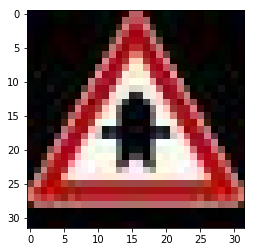

Actual sign:  18 (General caution)
Prediction 0: 18 (General caution) with a certainty of: 86%
Prediction 1: 26 (Traffic signals) with a certainty of: 13%
Prediction 2: 27 (Pedestrians) with a certainty of: 0%
Prediction 3: 24 (Road narrows on the right) with a certainty of: 0%
Prediction 4: 11 (Right-of-way at the next intersection) with a certainty of: 0%


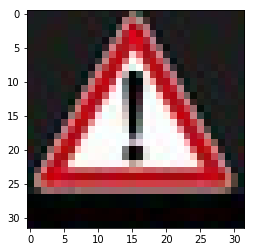

Actual sign:  21 (Double curve)
Prediction 0: 28 (Children crossing) with a certainty of: 96%
Prediction 1: 20 (Dangerous curve to the right) with a certainty of: 3%
Prediction 2: 11 (Right-of-way at the next intersection) with a certainty of: 0%
Prediction 3: 23 (Slippery road) with a certainty of: 0%
Prediction 4: 30 (Beware of ice/snow) with a certainty of: 0%


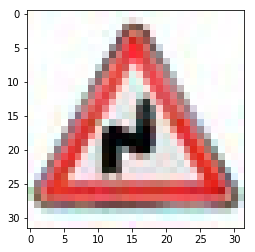

Actual sign:  25 (Road work)
Prediction 0: 25 (Road work) with a certainty of: 100%
Prediction 1: 20 (Dangerous curve to the right) with a certainty of: 0%
Prediction 2: 22 (Bumpy road) with a certainty of: 0%
Prediction 3: 31 (Wild animals crossing) with a certainty of: 0%
Prediction 4: 10 (No passing for vehicles over 3.5 metric tons) with a certainty of: 0%


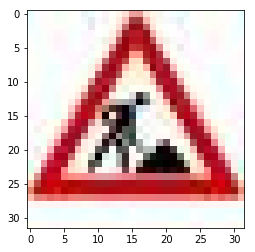

Actual sign:  31 (Wild animals crossing)
Prediction 0: 18 (General caution) with a certainty of: 88%
Prediction 1: 26 (Traffic signals) with a certainty of: 9%
Prediction 2: 0 (Speed limit (20km/h)) with a certainty of: 1%
Prediction 3: 38 (Keep right) with a certainty of: 0%
Prediction 4: 4 (Speed limit (70km/h)) with a certainty of: 0%


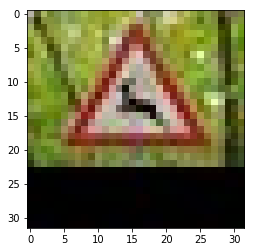

In [61]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

for i in range(len(top_k[1])):
    print("Actual sign:  " + str(custom_labels[i]) + " (" + sign_index_meaning[custom_labels[i]+1][1] + ")")
    for i2 in range(5):
        print("Prediction " + str(i2) + ": " + str(top_k[1][i][i2]) + " (" + sign_index_meaning[top_k[1][i][i2]+1][1] + ") with a certainty of: " + str(int((top_k[0][i][i2])*100)) + "%")
        
    plt.imshow(custom_images[i])
    plt.show()